<a href="https://colab.research.google.com/github/ussalbt/deep-learning-with-python/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [26]:
df= pd.read_csv("/content/sample_data/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [28]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [29]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4377,4378,15696301,Snider,719,France,Female,37,9,101455.700,1,1,0,25803.590,1
5414,5415,15600357,Findlay,495,France,Female,40,1,140197.710,2,1,0,150720.390,0
6645,6646,15648989,Moss,850,France,Male,37,4,126872.600,1,1,0,197266.580,0
6468,6469,15677184,Cremonesi,767,France,Female,35,6,115576.440,1,0,1,27922.450,0
1362,1363,15683841,Hamilton,555,Germany,Male,41,10,113270.200,2,1,1,185387.140,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [31]:
df.shape

(10000, 14)

In [32]:
df.duplicated().sum()

0

In [33]:
df.isna().sum().any()

False

In [34]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [35]:
missing(df)

,Missing_Number,Missing_Percent
RowNumber,0,0.000
CustomerId,0,0.000
Surname,0,0.000
CreditScore,0,0.000
Geography,0,0.000
Gender,0,0.000
Age,0,0.000
Tenure,0,0.000
Balance,0,0.000
NumOfProducts,0,0.000


In [36]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [38]:
df.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [39]:
drop_list=["RowNumber","CustomerId","Surname"]
df.drop(drop_list,axis=1,inplace=True)

In [40]:
df.shape

(10000, 11)

In [41]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

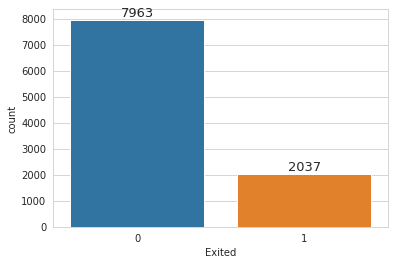

In [20]:
sns.countplot(x = df["Exited"], data = df)
for index,value in enumerate(df["Exited"].value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

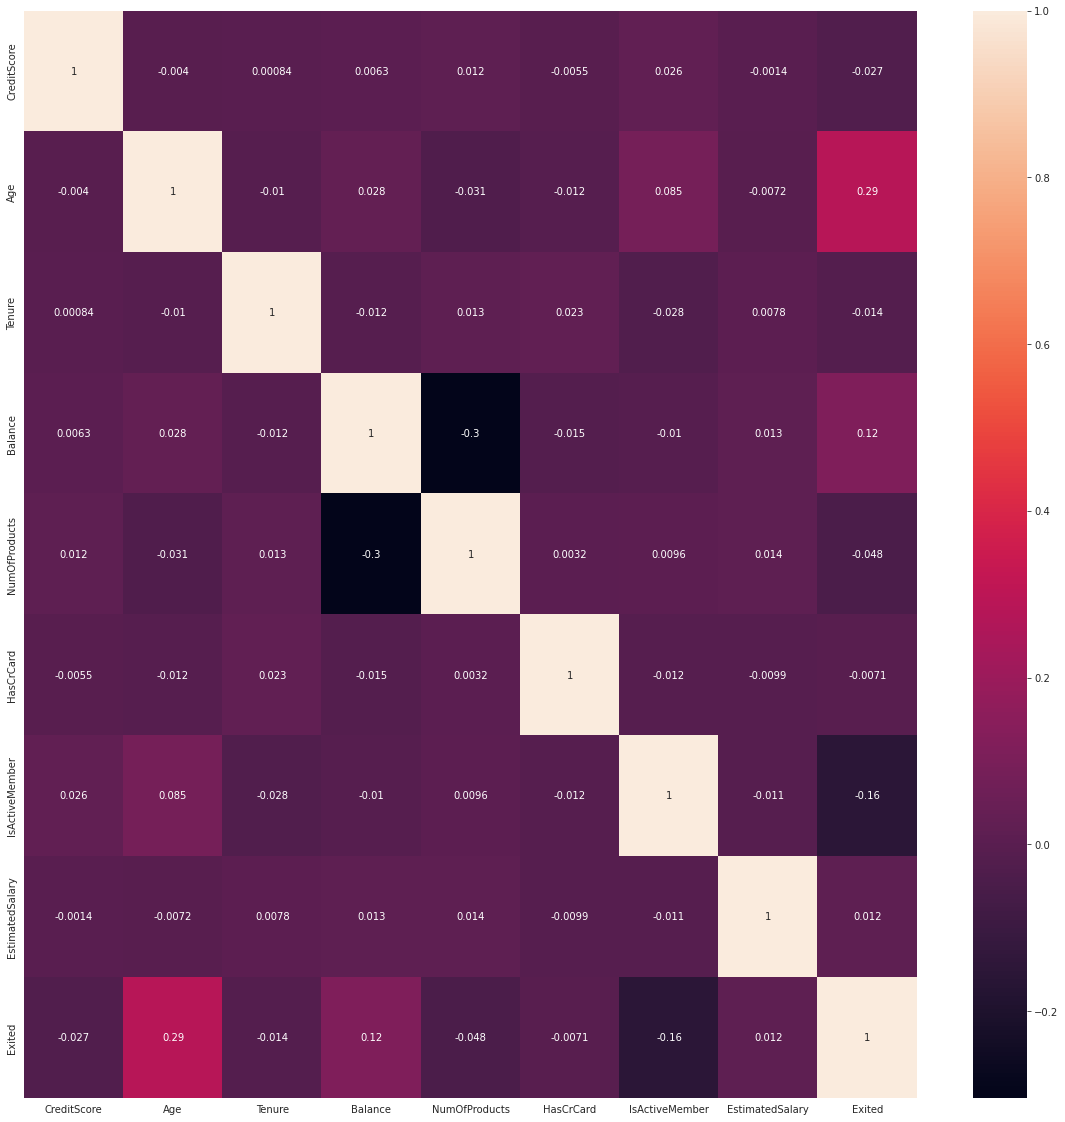

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

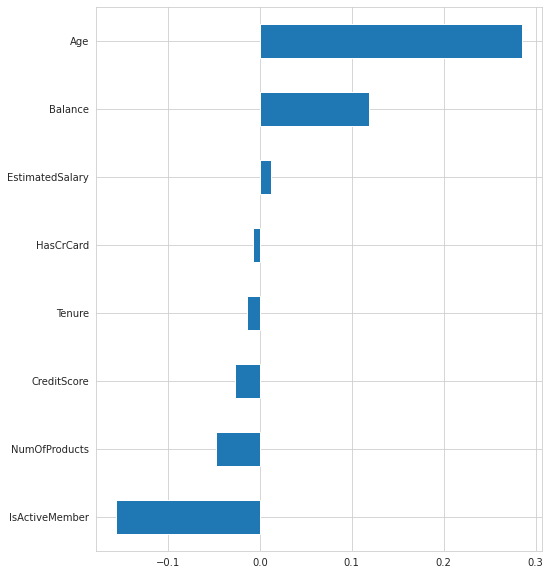

In [42]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [43]:
df= pd.get_dummies(df)

In [44]:
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0


In [45]:
df1=df.copy()

# Preprocessing of Data
- Train | Test Split, Scalling

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [47]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [48]:
seed = 42

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [50]:
scaler = MinMaxScaler()

In [51]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [53]:
X_train.shape

(9000, 13)

In [54]:
X_test.shape

(1000, 13)

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [56]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 512, epochs = 100, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 0.6429 - accuracy: 0.7849 - val_loss: 0.6038 - val_accuracy: 0.7989
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5746 - accuracy: 0.7960 - val_loss: 0.5354 - val_accuracy: 0.7989
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5177 - accuracy: 0.7960 - val_loss: 0.4932 - val_accuracy: 0.7989
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4957 - accuracy: 0.7960 - val_loss: 0.4834 - val_accuracy: 0.7989
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4901 - accuracy: 0.7960 - val_loss: 0.4764 - val_accuracy: 0.7989
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4842 - accuracy: 0.7960 - val_loss: 0.4709 - val_accuracy: 0.7989
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.7960 - val_loss: 0.4634 - val_accuracy: 0.7989
Epoch 8/100


In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                504       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.643,0.785,0.604,0.799
1,0.575,0.796,0.535,0.799
2,0.518,0.796,0.493,0.799
3,0.496,0.796,0.483,0.799
4,0.490,0.796,0.476,0.799


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

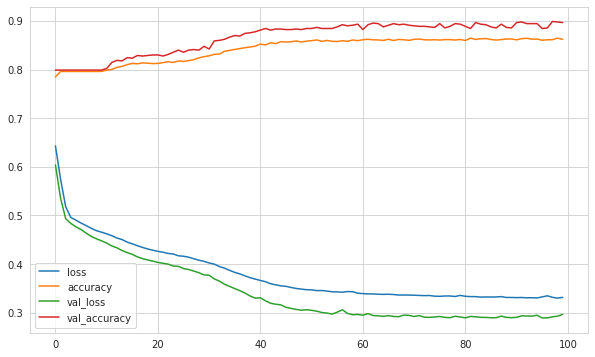

In [59]:
loss_df.plot();

In [60]:
model.evaluate(X_test, y_test, verbose=0)

[0.3426099121570587, 0.8600000143051147]

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3426099121570587
accuracy :  0.8600000143051147


In [62]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[749  47]
 [ 93 111]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       796
           1       0.70      0.54      0.61       204

    accuracy                           0.86      1000
   macro avg       0.80      0.74      0.76      1000
weighted avg       0.85      0.86      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [63]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [64]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [65]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 512, epochs = 100, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 24ms/step - loss: 0.6429 - accuracy: 0.7849 - val_loss: 0.6038 - val_accuracy: 0.7989
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5746 - accuracy: 0.7960 - val_loss: 0.5354 - val_accuracy: 0.7989
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5177 - accuracy: 0.7960 - val_loss: 0.4932 - val_accuracy: 0.7989
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4957 - accuracy: 0.7960 - val_loss: 0.4834 - val_accuracy: 0.7989
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4901 - accuracy: 0.7960 - val_loss: 0.4764 - val_accuracy: 0.7989
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4842 - accuracy: 0.7960 - val_loss: 0.4709 - val_accuracy: 0.7989
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4789 - accuracy: 0.7960 - val_loss: 0.4634 - val_accuracy: 0.7989
Epoch 8/100


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                504       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.643,0.785,0.604,0.799
1,0.575,0.796,0.535,0.799
2,0.518,0.796,0.493,0.799
3,0.496,0.796,0.483,0.799
4,0.490,0.796,0.476,0.799


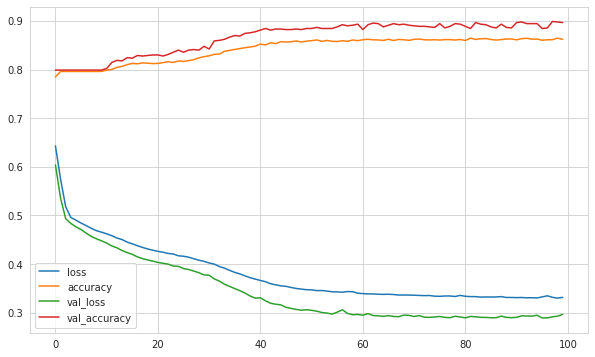

In [69]:
loss_df.plot();

In [70]:
model.evaluate(X_test, y_test, verbose=0)

[0.3426099121570587, 0.8600000143051147]

In [71]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3426099121570587
accuracy :  0.8600000143051147


In [72]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[749  47]
 [ 93 111]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       796
           1       0.70      0.54      0.61       204

    accuracy                           0.86      1000
   macro avg       0.80      0.74      0.76      1000
weighted avg       0.85      0.86      0.85      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [73]:
from tensorflow.keras.optimizers import Adam

In [74]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [78]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.8021 - val_loss: 0.4150 - val_accuracy: 0.8267
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4314 - accuracy: 0.8101 - val_loss: 0.3914 - val_accuracy: 0.8344
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3921 - accuracy: 0.8378 - val_loss: 0.3196 - val_accuracy: 0.8744
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3673 - accuracy: 0.8493 - val_loss: 0.3125 - val_accuracy: 0.8789
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3619 - accuracy: 0.8473 - val_loss: 0.3138 - val_accuracy: 0.8822
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8517 - val_loss: 0.3017 - val_accuracy: 0.8822
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8559 - val_loss: 0.2992 - val_accuracy:

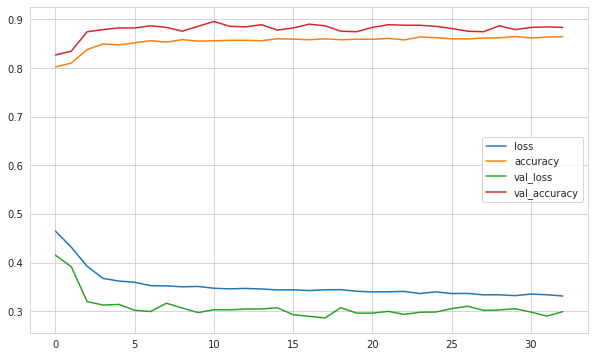

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [80]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3471659719944
accuracy :  0.859000027179718


In [81]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[759  37]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.73      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



### Add Dropout Layer

In [82]:
from tensorflow.keras.layers import Dropout

In [83]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [84]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5801 - accuracy: 0.7551 - val_loss: 0.4955 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5267 - accuracy: 0.7953 - val_loss: 0.4745 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5094 - accuracy: 0.7960 - val_loss: 0.4672 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7960 - val_loss: 0.4602 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5014 - accuracy: 0.7960 - val_loss: 0.4697 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.7960 - val_loss: 0.4559 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4863 - accuracy: 0.7960 - val_loss: 0.4534 - val_accuracy:

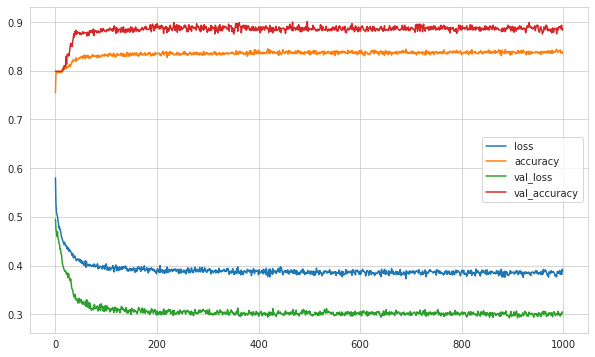

In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [87]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33864811062812805
accuracy :  0.859000027179718


In [88]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[771  25]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.43      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



### Add Early Stop

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

In [90]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [91]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [92]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5004 - accuracy: 0.7957 - val_loss: 0.4507 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4568 - accuracy: 0.8026 - val_loss: 0.4265 - val_accuracy: 0.8133
Epoch 3/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4373 - accuracy: 0.8104 - val_loss: 0.4057 - val_accuracy: 0.8356
Epoch 4/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4266 - accuracy: 0.8131 - val_loss: 0.3933 - val_accuracy: 0.8356
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4144 - accuracy: 0.8196 - val_loss: 0.3783 - val_accuracy: 0.8444
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4001 - accuracy: 0.8286 - val_loss: 0.3620 - val_accuracy: 0.8656
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3850 - accuracy: 0.8398 - val_loss: 0.3445 - val_accuracy:

In [95]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33845072984695435
accuracy :  0.8600000143051147


In [96]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[765  31]
 [109  95]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.47      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.75      1000
weighted avg       0.85      0.86      0.85      1000



#### Monitor the "val_loss" as metric

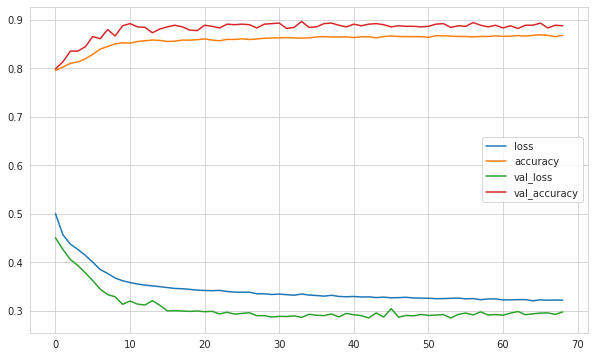

In [94]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### Monitor the "val_recall" as metric

In [ ]:
#?

## GridSearchCV

In [97]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [102]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [105]:
from keras.wrappers.scikit_learn import KerasClassifier

In [106]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [107]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
254/254 [==============================] - 1s 3ms/step - loss: 0.5004 - accuracy: 0.7957 - val_loss: 0.4507 - val_accuracy: 0.7989
Epoch 2/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4568 - accuracy: 0.8026 - val_loss: 0.4265 - val_accuracy: 0.8133
Epoch 3/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.8104 - val_loss: 0.4057 - val_accuracy: 0.8356
Epoch 4/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8131 - val_loss: 0.3933 - val_accuracy: 0.8356
Epoch 5/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4144 - accuracy: 0.8196 - val_loss: 0.3783 - val_accuracy: 0.8444
Epoch 6/200
254/254 [==============================] - 1s 2ms/step - loss: 0.4001 - accuracy: 0.8286 - val_loss: 0.3620 - val_accuracy: 0.8656
Epoch 7/200
254/254 [==============================] - 1s 2ms/step - loss: 0.38

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0062b3e690>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [108]:
grid_model.best_score_

0.8622222222222222

In [109]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.001,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [110]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.862,0.012,1,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
15,0.860,0.013,2,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
20,0.860,0.014,3,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
16,0.860,0.014,4,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
3,0.860,0.014,5,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
5,0.860,0.013,5,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
1,0.859,0.014,7,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
12,0.859,0.013,8,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
8,0.858,0.013,9,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
7,0.858,0.014,10,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."


In [111]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[765  31]
 [109  95]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.47      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.75      1000
weighted avg       0.85      0.86      0.85      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

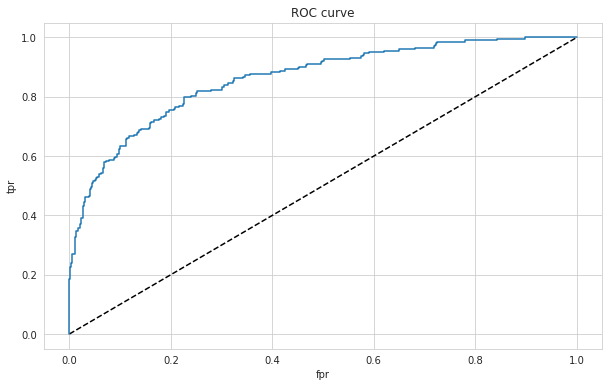

In [112]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show();

In [113]:
roc_auc_score(y_test, y_pred_proba)

0.8606636121785398

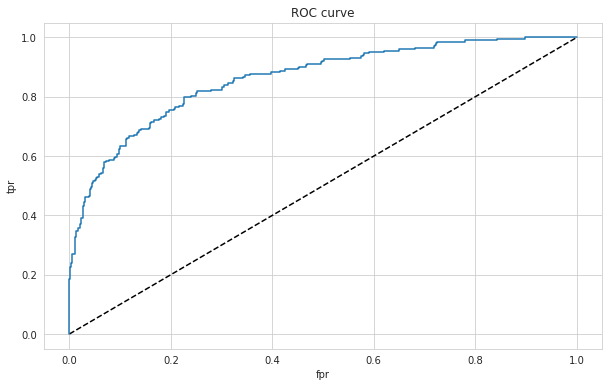

In [114]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show();

In [115]:
roc_auc_score(y_test, y_pred_proba)

0.8606636121785398

# Final Model and Model Deployment

In [116]:
import pickle
pickle.dump(scaler, open("scaler_exited", 'wb'))

In [117]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [118]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [119]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
282/282 [==============================] - 2s 3ms/step - loss: 0.5011 - accuracy: 0.7959 - val_loss: 0.4657 - val_accuracy: 0.7960
Epoch 2/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.8034 - val_loss: 0.4447 - val_accuracy: 0.8050
Epoch 3/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4323 - accuracy: 0.8139 - val_loss: 0.4336 - val_accuracy: 0.7970
Epoch 4/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4205 - accuracy: 0.8168 - val_loss: 0.4265 - val_accuracy: 0.8120
Epoch 5/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8244 - val_loss: 0.4006 - val_accuracy: 0.8240
Epoch 6/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8341 - val_loss: 0.3798 - val_accuracy: 0.8430
Epoch 7/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.3706 - accuracy: 0.8469 - val_loss: 0.3653 - val_accuracy:

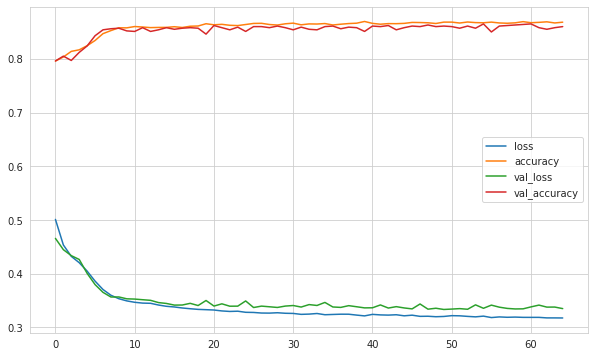

In [121]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [122]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3334398865699768
accuracy :  0.8610000014305115


In [123]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[765  31]
 [108  96]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.76      0.47      0.58       204

    accuracy                           0.86      1000
   macro avg       0.82      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [124]:
model.save('model_exited.h5')

In [125]:
from tensorflow.keras.models import load_model

In [126]:
model_exited = load_model('model_exited.h5')
scaler_exited = pickle.load(open("scaler_exited", "rb"))

## Prediction

In [127]:
customer = df.drop('Exited', axis = 1).iloc[0:1, :]
customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [132]:
customer= scaler_exited.transform(customer)
customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [133]:
(model_exited.predict(customer) > 0.5).astype("int32")
#model_cancer.predict_classes(single_patient)

array([[0]], dtype=int32)

In [134]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___